In [ ]:
#Project: Predicting Fossil Fuel Consumption & Production from Renewable Energy Consumption & Production
#loads the U.S. EIA Primary Energy Overview dataset into pandas dataframe for initial inspection

import pandas as pd
data = pd.read_excel("Table 01.01.xlsx")
data

,U.S. Energy Information Administration,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,September 2025 Monthly Energy Review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Release Date: September 25, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Next Update: October 28, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2025 February,6.675326,0.646232,0.691849,8.013407,1.607167,2.422174,-0.815006,0.889637,6.768933,0.646232,0.666435,8.088038
636,2025 March,7.627666,0.652797,0.810548,9.091011,1.664096,2.709576,-1.04548,-0.214923,6.395228,0.652797,0.779815,7.830608
637,2025 April,7.31913,0.605093,0.780418,8.70464,1.631141,2.532869,-0.901728,-0.504222,5.925776,0.605093,0.762128,7.298691
638,2025 May,7.59187,0.649538,0.791141,9.032548,1.73537,2.57784,-0.84247,-0.776777,5.998094,0.649538,0.757706,7.413301


In [ ]:
#Data cleaning - remove empty rows and assign proper headers
data = data[~data["Unnamed: 1"].isna()]

for cols in (0,1,2,3,4,5,6,7,8,9,10,11,12):
  data = data.rename(columns = {data.columns[cols]:data[data.columns[cols]].iloc[0]} )

data = data.drop(data.index[:2])

In [ ]:
#Convert month to datetime format and extract our key columns
data['Date'] = pd.to_datetime(data['Month'], format="%Y %B", errors='coerce')
data
ff_df = data.iloc[:, [1,3,9, 11,13]]
ff_df



,Total Fossil Fuels Production,Total Renewable Energy Production,Total Fossil Fuels Consumption,Total Renewable Energy Consumption,Date
10,4.932632,0.219839,6.747651,0.219839,1973-01-01
11,4.729582,0.19733,6.163095,0.19733,1973-02-01
12,4.946902,0.218686,6.044647,0.218686,1973-03-01
13,4.716271,0.20933,5.493184,0.20933,1973-04-01
14,4.956995,0.215982,5.613551,0.215982,1973-05-01
...,...,...,...,...,...
635,6.675326,0.691849,6.768933,0.666435,2025-02-01
636,7.627666,0.810548,6.395228,0.779815,2025-03-01
637,7.31913,0.780418,5.925776,0.762128,2025-04-01
638,7.59187,0.791141,5.998094,0.757706,2025-05-01


In [ ]:
ff_df.to_csv('data_final.csv', index=False)

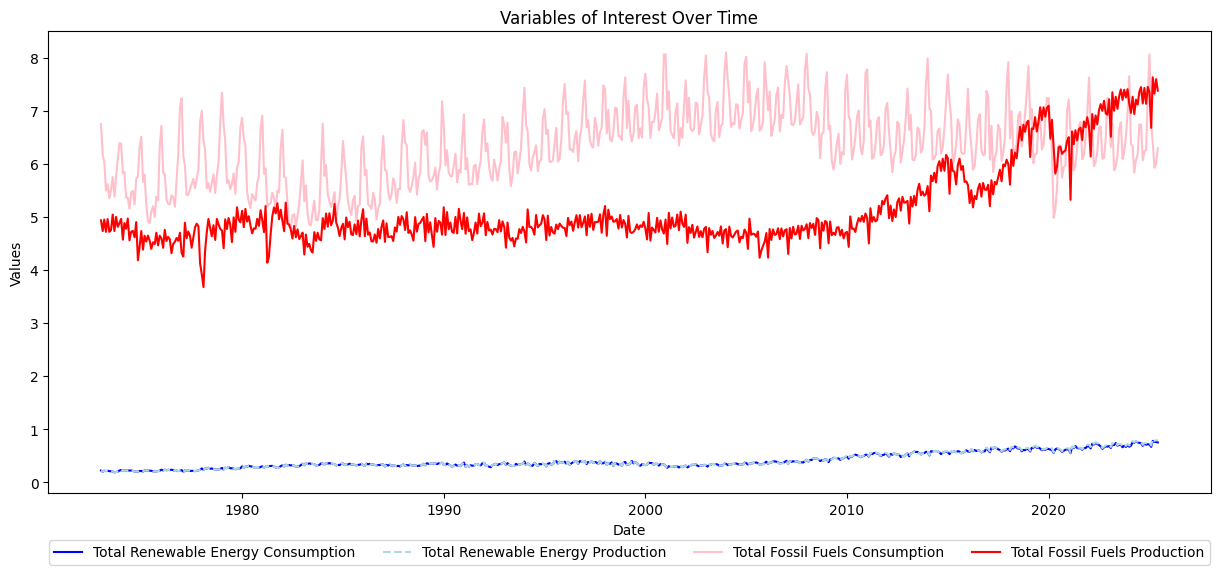

In [ ]:
#EDA
#Line graph - renewable energy & fossil fuel production and consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(ff_df.Date, ff_df["Total Renewable Energy Consumption"], label="Total Renewable Energy Consumption", color='blue', linestyle='-')
plt.plot(ff_df.Date, ff_df["Total Renewable Energy Production"], label='Total Renewable Energy Production', color='lightblue', linestyle='--')
plt.plot(ff_df.Date, ff_df["Total Fossil Fuels Consumption"], label="Total Fossil Fuels Consumption", color='pink', linestyle='-')
plt.plot(ff_df.Date, ff_df["Total Fossil Fuels Production"], label='Total Fossil Fuels Production', color='red', linestyle='-')
plt.title('Variables of Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.17))
plt.savefig('line_plot.png', dpi = 300)
plt.show()

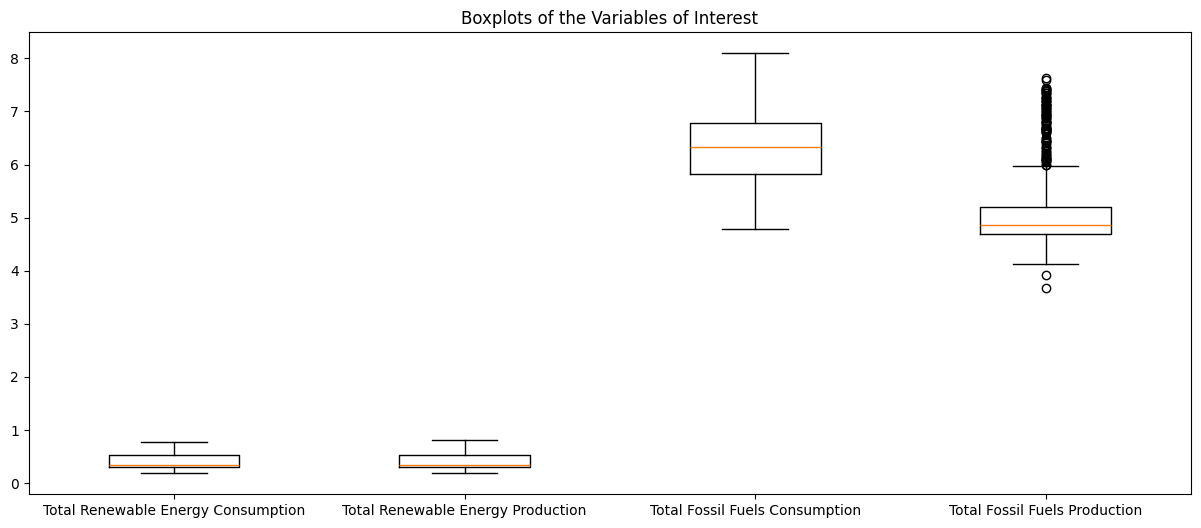

In [ ]:
#EDA
#Boxplot - distribution/scale of fossil & renewable variables
plt.figure(figsize=(15, 6))
plt.boxplot(ff_df.loc[:, ["Total Renewable Energy Consumption","Total Renewable Energy Production","Total Fossil Fuels Consumption", "Total Fossil Fuels Production"]])
plt.xticks([1, 2, 3, 4], ["Total Renewable Energy Consumption","Total Renewable Energy Production","Total Fossil Fuels Consumption", "Total Fossil Fuels Production"])
plt.title('Boxplots of the Variables of Interest')
plt.savefig('boxplot.png')
plt.show()

In [ ]:
#VARMAX model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX

# Prep
ff_df2 = ff_df.set_index('Date').asfreq('MS')
for col in ff_df2.columns:
    ff_df2[col] = pd.to_numeric(ff_df2[col], errors='coerce')

# First differencing
ffd = ff_df2.diff().dropna()

Yd = ffd[['Total Fossil Fuels Production', 'Total Fossil Fuels Consumption']].astype('float64')
Xd = ffd[['Total Renewable Energy Production', 'Total Renewable Energy Consumption']].astype('float64')

# 80/20 split
split_idx = int(len(Yd) * 0.8)
Y_train, Y_test = Yd.iloc[:split_idx], Yd.iloc[split_idx:]
X_train, X_test = Xd.iloc[:split_idx], Xd.iloc[split_idx:]

#Fit VARMAX on differences
model = VARMAX(
    endog=Y_train.to_numpy(),          #passed in arrays due to previous errors
    exog=X_train.to_numpy(),
    order=(1, 0),
    trend='c',
    enforce_stationarity=True,
    enforce_invertibility=True
)
res = model.fit(disp=False, maxiter=800)

# Forecast held-out test window
pred = res.get_forecast(steps=len(Y_test), exog=X_test.to_numpy())
fc_mean = pd.DataFrame(pred.predicted_mean, index=Y_test.index, columns=Y_test.columns)

# Metrics
for col in Y_test.columns:
    mae  = mean_absolute_error(Y_test[col], fc_mean[col])
    rmse = np.sqrt(mean_squared_error(Y_test[col], fc_mean[col]))
    print(f"[VARMAX Δ] {col}  MAE={mae:.4f}  RMSE={rmse:.4f}")

# for use later in plotting/visualization for presentation
last_level = ff_df2.iloc[split_idx-1][['Total Fossil Fuels Production','Total Fossil Fuels Consumption']]
level_fc = fc_mean.cumsum()
level_fc = level_fc.add(last_level, axis='columns')

[VARMAX Δ] Total Fossil Fuels Production  MAE=0.1693  RMSE=0.2300
[VARMAX Δ] Total Fossil Fuels Consumption  MAE=0.3896  RMSE=0.4952
[VARMAX Δ] Ljung–Box p (lag12) Total Fossil Fuels Production: 0.000
[VARMAX Δ] Ljung–Box p (lag12) Total Fossil Fuels Consumption: 0.000


In [ ]:
#XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

ffd = ff_df2.diff().dropna()

# Targets: month-over-month change
Yd = ffd[['Total Fossil Fuels Production','Total Fossil Fuels Consumption']]

# Base exog: month-over-month change in renewables
Xd_base = ffd[['Total Renewable Energy Production','Total Renewable Energy Consumption']]

# 12 lags of renewable deltas
Xd = Xd_base.copy()
for L in range(1, 13):
    Xd[f'ren_prod_d_lag{L}'] = Xd_base['Total Renewable Energy Production'].shift(L)
    Xd[f'ren_cons_d_lag{L}'] = Xd_base['Total Renewable Energy Consumption'].shift(L)

data = pd.concat([Yd, Xd], axis=1).dropna()
feat_cols = [c for c in data.columns if c.startswith('ren_') or c.startswith('fossil_')]

# 80/20 split
split_idx = int(len(data) * 0.8)
Xtr, Xte = data[feat_cols].iloc[:split_idx], data[feat_cols].iloc[split_idx:]

def run_xgb(target_col, label):
    ytr, yte = data[target_col].iloc[:split_idx], data[target_col].iloc[split_idx:]

    # Metrics
    final = XGBRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3,
        subsample=0.9, colsample_bytree=0.9, random_state=42
    )
    final.fit(Xtr, ytr)
    yhat = final.predict(Xte)

    print(f"[XGB Δ TEST] {label}: MAE={mean_absolute_error(yte, yhat):.4f}  "
          f"RMSE={np.sqrt(mean_squared_error(yte, yhat)):.4f} ")

    # Top features
    top = sorted(zip(feat_cols, final.feature_importances_), key=lambda x: -x[1])[:10]
    print(f"[XGB Δ] Top features for {label}:", dict(top))

# Run for both targets
run_xgb('Total Fossil Fuels Production', "Δ Production")
run_xgb('Total Fossil Fuels Consumption', "Δ Consumption")

[XGB Δ TEST] Δ Production: MAE=0.1432  RMSE=0.2165 
[XGB Δ] Top features for Δ Production: {'ren_cons_d_lag12': np.float32(0.15549132), 'ren_prod_d_lag12': np.float32(0.11590096), 'ren_cons_d_lag11': np.float32(0.11260177), 'ren_prod_d_lag11': np.float32(0.06762117), 'ren_prod_d_lag6': np.float32(0.062364064), 'ren_prod_d_lag5': np.float32(0.04222694), 'ren_prod_d_lag1': np.float32(0.04192258), 'ren_cons_d_lag6': np.float32(0.039956532), 'ren_cons_d_lag4': np.float32(0.03617401), 'ren_cons_d_lag1': np.float32(0.03452374)}
[XGB Δ TEST] Δ Consumption: MAE=0.2556  RMSE=0.3482 
[XGB Δ] Top features for Δ Consumption: {'ren_prod_d_lag12': np.float32(0.24010594), 'ren_prod_d_lag4': np.float32(0.07898253), 'ren_cons_d_lag12': np.float32(0.077818155), 'ren_cons_d_lag9': np.float32(0.06540977), 'ren_cons_d_lag10': np.float32(0.0532405), 'ren_cons_d_lag11': np.float32(0.05255725), 'ren_cons_d_lag4': np.float32(0.045990966), 'ren_prod_d_lag10': np.float32(0.037806675), 'ren_prod_d_lag9': np.float

In [ ]:
ff_df

,Total Fossil Fuels Production,Total Renewable Energy Production,Total Fossil Fuels Consumption,Total Renewable Energy Consumption,Date
10,4.932632,0.219839,6.747651,0.219839,1973-01-01
11,4.729582,0.19733,6.163095,0.19733,1973-02-01
12,4.946902,0.218686,6.044647,0.218686,1973-03-01
13,4.716271,0.20933,5.493184,0.20933,1973-04-01
14,4.956995,0.215982,5.613551,0.215982,1973-05-01
...,...,...,...,...,...
635,6.675326,0.691849,6.768933,0.666435,2025-02-01
636,7.627666,0.810548,6.395228,0.779815,2025-03-01
637,7.31913,0.780418,5.925776,0.762128,2025-04-01
638,7.59187,0.791141,5.998094,0.757706,2025-05-01
